In [1]:
import pandas as pd
import numpy as np
import zipfile
import tarfile
import matplotlib.pyplot as plt
import seaborn as sns

### Loading data for both BeerAdvocate and RateBeer

In [2]:
path_ba = 'BeerAdvocate.tar.gz'
path_rb = 'RateBeer.tar.gz'

In [3]:
with tarfile.open(path_ba) as tar:
    csv_path = tar.getnames()
    
    ba_beers = pd.read_csv(tar.extractfile(csv_path[0]))
    ba_users = pd.read_csv(tar.extractfile(csv_path[2]))
    ba_breweries = pd.read_csv(tar.extractfile(csv_path[3]))

In [4]:
ba_users['location'] = ba_users['location'].str.split(',').str[0]

In [6]:
with tarfile.open(path_rb) as tar:
    csv_path = tar.getnames()
    
    rb_beers = pd.read_csv(tar.extractfile(csv_path[0]))
    rb_users = pd.read_csv(tar.extractfile(csv_path[2]))
    rb_breweries = pd.read_csv(tar.extractfile(csv_path[3]))

In [7]:
rb_users['location'] = rb_users['location'].str.split(',').str[0]

### Counting number of users in each country

As a user can have two different user names in RateBeer and BeerAdvocate, we need to count separetly.

In [8]:
rb_user_count_country = rb_users.groupby('location')['location'].count().sort_values(ascending=False).reset_index(name='nb users RB')
ba_user_count_country = ba_users.groupby('location')['location'].count().sort_values(ascending=False).reset_index(name='nb users BA')

In [9]:
# merge the two above data frames to count the total number of users per country
users_country = rb_user_count_country.merge(ba_user_count_country, on='location')
users_country['total nb of users'] = users_country['nb users RB'] + users_country['nb users BA']
users_country = users_country.sort_values('total nb of users', ascending=False)
users_country.head()

,location,nb users RB,nb users BA,total nb of users
0,United States,26855,113223,140078
1,Canada,3255,3324,6579
2,England,2734,791,3525
4,Australia,1476,520,1996
3,Poland,1701,64,1765


([0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
 [Text(0, 0, 'United States'),
  Text(1, 0, 'Canada'),
  Text(2, 0, 'England'),
  Text(3, 0, 'Australia'),
  Text(4, 0, 'Poland'),
  Text(5, 0, 'Netherlands'),
  Text(6, 0, 'Sweden'),
  Text(7, 0, 'Germany'),
  Text(8, 0, 'Belgium'),
  Text(9, 0, 'Denmark')])

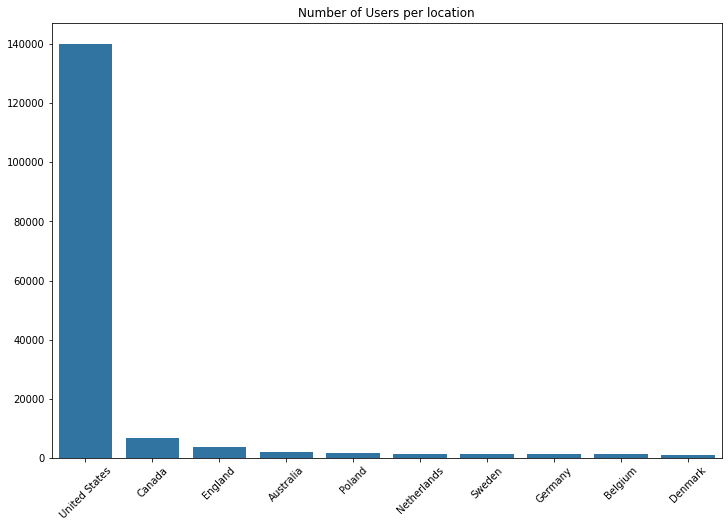

In [10]:
# plotting the distribution
plt.figure(figsize=(12,8))
sns.barplot(x=users_country['location'].values[:10], y=users_country['total nb of users'].values[:10])
plt.title('Number of Users per location')
plt.xticks(rotation=45)

As we see, most of the users are present in the United States. Therefore, we will only consider the US for the analysis.

### From a list of key words, looking how many reviews contain those words

In [11]:
# key words taken from https://appellationbeer.com/blog/words-to-describe-the-beer-you-are-tasting/

flavors = 'Malty, biscuity, breadlike, grainy, rich, deep, roasty, cereal, cookie-like, coffeeish, caramelly, toffee-like, molasses-like, malt complexity, smoky, sweet, autumnal, burnt cream, scalded milk, oatmeal, rustic, layered'.split(',')
flavor_bitterness = 'Piney, citrusy, grapefruity, earthy, musty, spicy, sharp, bright, fresh, herbal, zippy, lemony, newly-mown lawn, aromatic, floral, springlike, brilliant, sprucelike, juniper-like, minty, pungent, elegant, grassy'.split(',')
fermentation_taste = 'Fresh-baked bread, clovelike, bubblegum, yeasty, Belgiany, aromatic, tropical, subtle, fruity, clean, banana-like, horseblankety, earthy, musty'.split(',')
conditioning = 'Soft, effervescent, spritzy, sparkling, zippy, pinpoint, bubbly, gentle, low carbonation, highly carbonated'.split(',')
body_mouthfeel = 'Rich, full, light, slick, creamy, oily, heavy, velvety, sweet, dry, thick, thin'.split(',')
alcohol_flavors = 'Warm finish, heat, vodka, esters, pungent, strength'.split(',')

In [12]:
# creating dict from lists

flavors_dict = {x:0 for x in flavors}
flavor_bitterness_dict = {x:0 for x in flavor_bitterness}
fermentation_taste_dict = {x:0 for x in fermentation_taste}
conditioning_dict = {x:0 for x in conditioning}
body_mouthfeel_dict = {x:0 for x in body_mouthfeel}
alcohol_flavors_dict = {x:0 for x in alcohol_flavors}

In [28]:
# extracting texts
texts = []
with open('reviews_RateBeer.txt') as f:
    for l in f:
        splitted = l.split(':')
        if 'text' in splitted[0]:
            texts.append(splitted[1].replace('\n',''))

In [38]:
# counting number of key words in texts

key_words_lists = [flavors, flavor_bitterness, fermentation_taste, conditioning, body_mouthfeel, alcohol_flavors]
key_words_dict = [flavors_dict, flavor_bitterness_dict, fermentation_taste_dict, conditioning_dict, body_mouthfeel_dict, alcohol_flavors_dict]
categories = 'Flavors, Flavor bitterness, fermentation taste, conditioning, body mouthfeel, alcohol flaors'.split(',')

In [33]:
for i, ls in enumerate(key_words_lists):
    current_dict = key_words_dict[i]
    
    for w in ls:
        for text in texts:
            if w in text:
                current_dict[w] += 1

In [45]:
flavors_dict[' sweet']

2149002

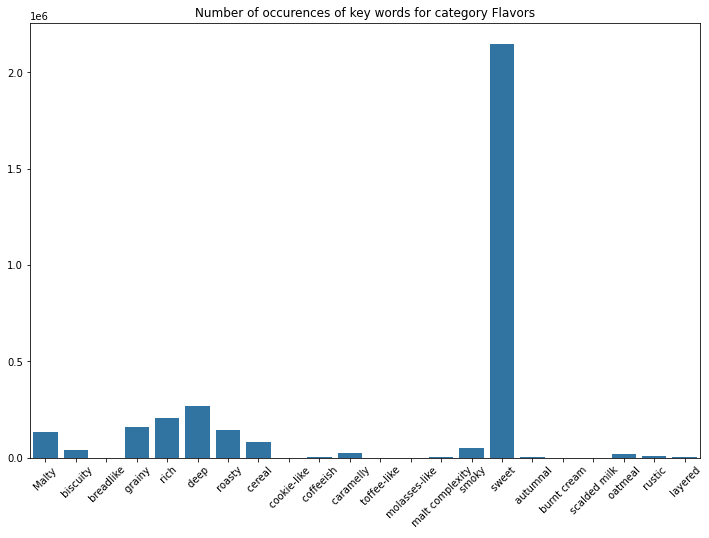

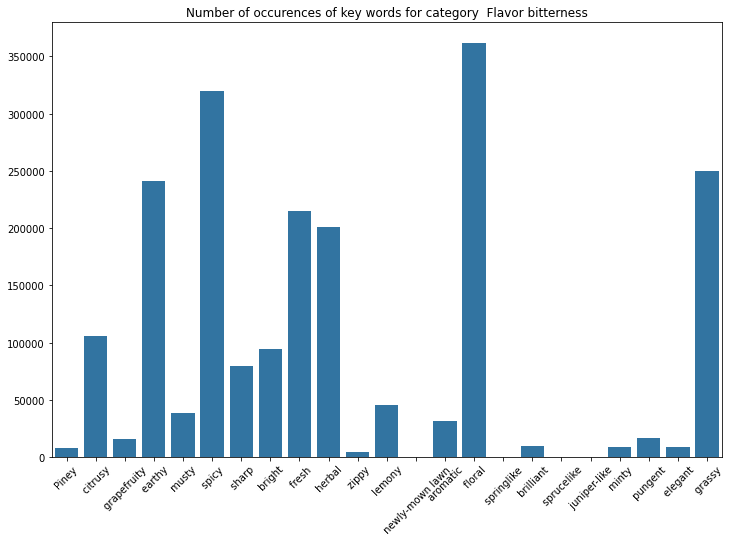

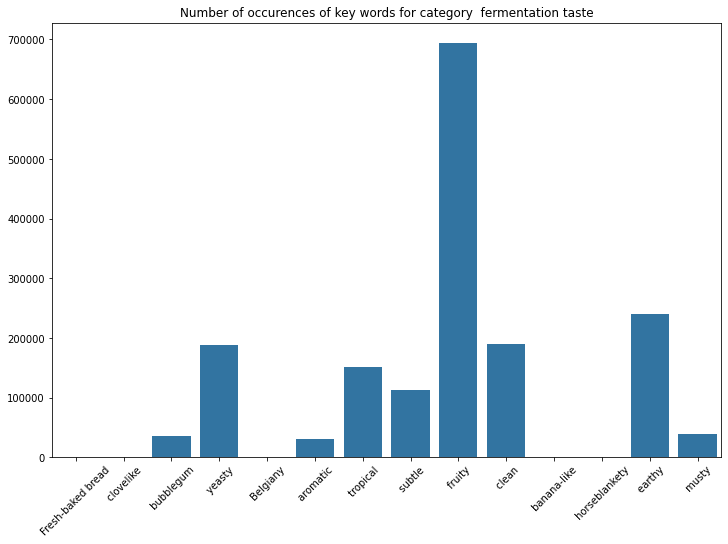

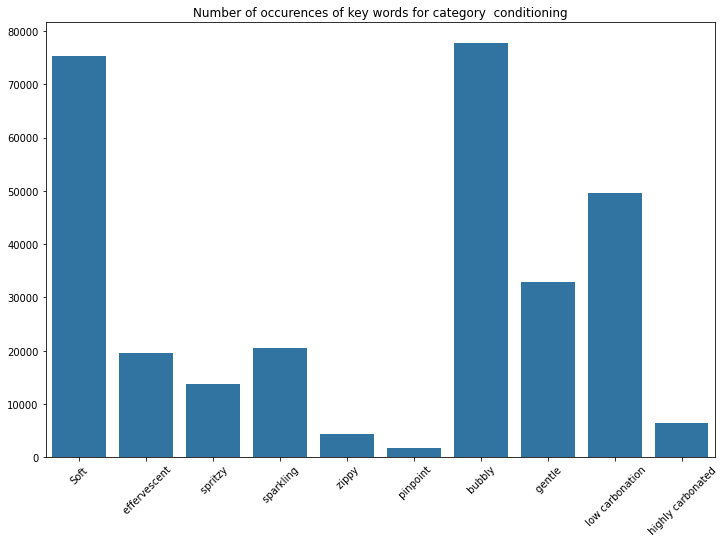

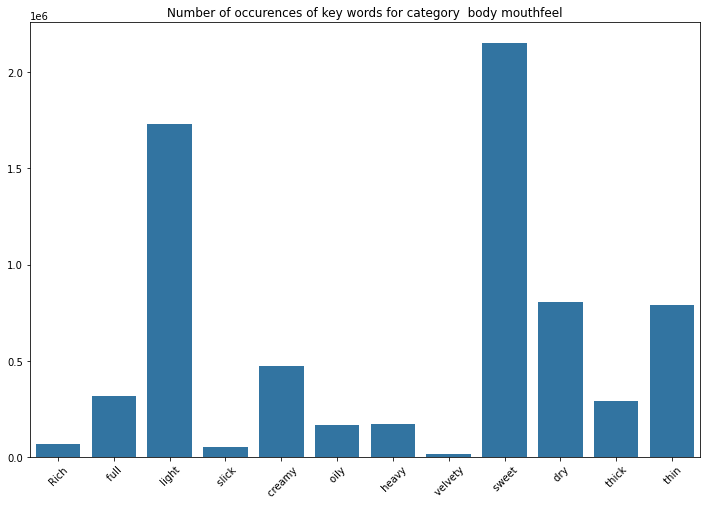

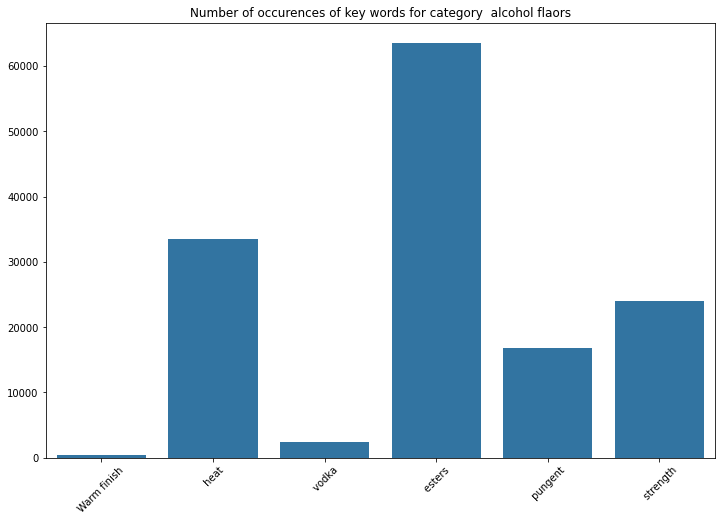

In [41]:
# plotting the occurences per catefory
for i,d in enumerate(key_words_dict):
    category = categories[i]
    plt.figure(figsize=(12,8))
    sns.barplot(x=d.keys(), y=d.values())
    plt.title('Number of occurences of key words for category ' + category)
    plt.xticks(rotation=45)